# Training logistic Regression classifier


In [ ]:
import pvml
import build_vocabulary as bv
import features_extraction as fe
import pandas as pd
import make_statistics as ms

voc = bv.get_vocabulary(path='../dataset/', numWords=1000, save=False)
X_train, Y_train = fe.get_bow_representation(voc)
X_valid, Y_valid = fe.get_bow_representation(voc, no_clickbait_path='../dataset/non_clickbait_validation.txt',
                                             clickbait_path='../dataset/clickbait_validation.txt', save=False, stemming=False)

learning_rates = [0.00001, 0.00003, 0.0001, 0.0003, 0.001, 0.003, 0.01, 0.03]
validation_accuracy = []
validation_fpr = []


for lr in learning_rates:
    w, b = pvml.logreg_train(
        X_train, Y_train, lambda_=0.00001, lr=lr, steps=1000, init_w=None, init_b=0)

    P = pvml.logreg_inference(X_valid, w, b)
    prediction = (P > 0.5)
    accuracy_validation = (prediction == Y_valid).mean()

    true_positives, true_negatives, false_positives, false_negatives, fpr = ms.calculate_metrics(
        Y_valid, prediction)

    validation_accuracy.append(accuracy_validation*100)
    validation_fpr.append(fpr*100)

results = pd.DataFrame({'Learning rates': learning_rates,
                       'Validation accuracy': validation_accuracy, 'Validation FPR': validation_fpr})
results.to_csv('../data/fpr_analysis/logistic_diff_lr.csv')

<Axes: title={'center': 'Comparison of different learning rates'}, xlabel='Learning rates', ylabel='False Positive Rate (%)'>

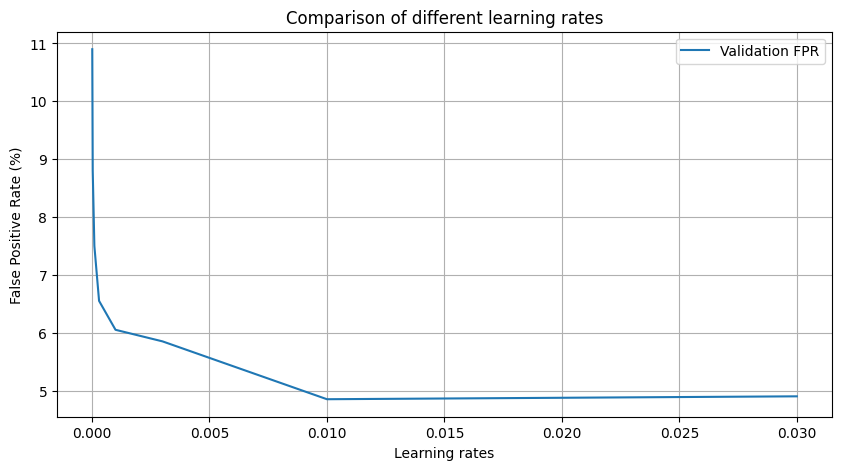

In [2]:
import pandas as pd

data = pd.read_csv('../data/fpr_analysis/logistic_diff_lr.csv')
data.plot(kind='line', x='Learning rates', y=['Validation FPR'], figsize=(10, 5), grid=True,
          title='Comparison of different learning rates', ylabel='False Positive Rate (%)')

# Comparing different vocabulary size


In [ ]:
import pvml
import build_vocabulary as bv
import features_extraction as fe
import pandas as pd

validation_accuracy = []
validation_fpr = []
vocabulary_size = []

for voc_size in range(1000, 10001, 1000):
    voc = bv.get_vocabulary(path='../dataset/', numWords=voc_size, save=False)
    X_train, Y_train = fe.get_bow_representation(voc)
    X_valid, Y_valid = fe.get_bow_representation(voc, no_clickbait_path='../dataset/non_clickbait_validation.txt',
                                                 clickbait_path='../dataset/clickbait_validation.txt', save=False, stemming=False)
    w, b = pvml.logreg_train(
        X_train, Y_train, lambda_=0.00001, lr=0.01, steps=1000, init_w=None, init_b=0)

    P = pvml.logreg_inference(X_valid, w, b)
    prediction = (P > 0.5)
    accuracy_validation = (prediction == Y_valid).mean()

    true_positives, true_negatives, false_positives, false_negatives, fpr = ms.calculate_metrics(
        Y_valid, prediction)

    validation_accuracy.append(accuracy_validation*100)
    validation_fpr.append(fpr*100)
    vocabulary_size.append(voc_size)

results = pd.DataFrame({'Vocabulary size': vocabulary_size,
                       'Validation accuracy': validation_accuracy, 'Validation FPR': validation_fpr})
results.to_csv('../data/fpr_analysis/logistic_diff_voc_size.csv')

<Axes: title={'center': 'Comparison of different vocabulary sizes'}, xlabel='Vocabulary size', ylabel='False Positive Rate (%)'>

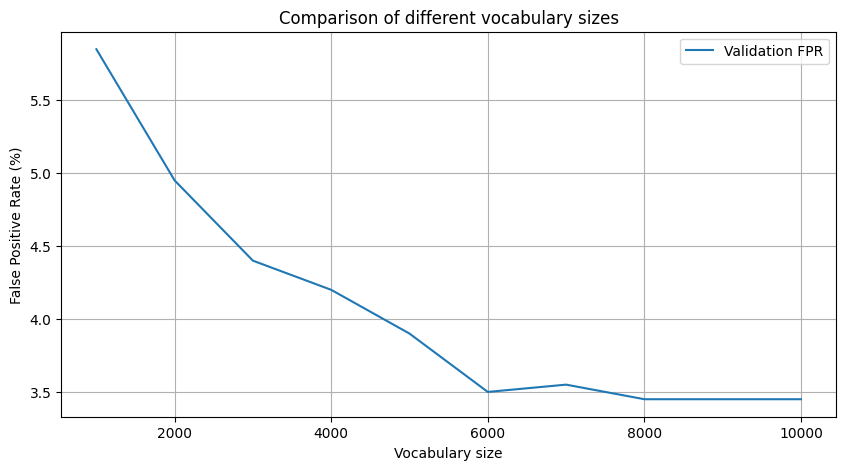

In [4]:
import pandas as pd

data = pd.read_csv('../data/fpr_analysis/logistic_diff_voc_size.csv')
data.plot(kind='line', x='Vocabulary size', y=['Validation FPR'], figsize=(10, 5), grid=True,
          title='Comparison of different vocabulary sizes', ylabel='False Positive Rate (%)')

# Logistic regression without most common words


In [5]:
import pvml
import build_vocabulary as bv
import features_extraction as fe
import make_statistics as ms


words_to_ignore = []
f = open('../data/stopwords.txt', 'r')
n = 0
for w in f.read().split():
    words_to_ignore.append(w)
    n += 1
f.close()

voc_no_common_words = [word for word in voc if word not in words_to_ignore]

voc = bv.get_vocabulary(path='../dataset/', numWords=8000, save=False)
X_train, Y_train = fe.get_bow_representation(voc_no_common_words)
X_valid, Y_valid = fe.get_bow_representation(voc_no_common_words, no_clickbait_path='../dataset/non_clickbait_validation.txt',
                                             clickbait_path='../dataset/clickbait_validation.txt', save=False, stemming=False)
w, b = pvml.logreg_train(
    X_train, Y_train, lambda_=0.00001, lr=0.01, steps=1000, init_w=None, init_b=0)

P = pvml.logreg_inference(X_valid, w, b)
prediction = (P > 0.5)
accuracy_validation = (prediction == Y_valid).mean()

true_positives, true_negatives, false_positives, false_negatives, fpr = ms.calculate_metrics(
    Y_valid, prediction)

print('Validation accuracy: ', accuracy_validation*100)
print('Validation FPR: ', fpr*100)

Validation accuracy:  94.525
Validation FPR:  5.050000000000001


# Logistic regression with stemming


In [6]:
import pvml
import build_vocabulary as bv
import features_extraction as fe
import make_statistics as ms


voc = bv.get_vocabulary(path='../dataset/', numWords=8000, save=False)
X_train, Y_train = fe.get_bow_representation(voc, stemming=True)
X_valid, Y_valid = fe.get_bow_representation(voc, no_clickbait_path='../dataset/non_clickbait_validation.txt',
                                             clickbait_path='../dataset/clickbait_validation.txt', save=False, stemming=True)
w, b = pvml.logreg_train(
    X_train, Y_train, lambda_=0.00001, lr=0.01, steps=1000, init_w=None, init_b=0)

P = pvml.logreg_inference(X_valid, w, b)
prediction = (P > 0.5)
accuracy_validation = (prediction == Y_valid).mean()

true_positives, true_negatives, false_positives, false_negatives, fpr = ms.calculate_metrics(
    Y_valid, prediction)

print('Validation accuracy: ', accuracy_validation*100)
print('Validation FPR: ', fpr*100)

Validation accuracy:  96.375
Validation FPR:  3.4000000000000004


# Optimal number of iterations


In [ ]:
import pvml
import build_vocabulary as bv
import features_extraction as fe
import pandas as pd
import make_statistics as ms
validation_accuracy = []
validation_fpr = []
iterations = []
voc = bv.get_vocabulary(path='../dataset/', numWords=8000, save=False)
X_train, Y_train = fe.get_bow_representation(voc)
X_valid, Y_valid = fe.get_bow_representation(voc, no_clickbait_path='../dataset/non_clickbait_validation.txt',
                                             clickbait_path='../dataset/clickbait_validation.txt', save=False, stemming=False)
w = None
b = 0
for iteration in range(1, 101):
    w, b = pvml.logreg_train(
        X_train, Y_train, lambda_=0.00001, lr=0.01, steps=50, init_w=w, init_b=b)

    P = pvml.logreg_inference(X_valid, w, b)
    prediction_valid = (P > 0.5)
    accuracy_validation = (prediction_valid == Y_valid).mean()

    true_positive, true_negative, false_positive, false_negative, false_positive_rate= ms.calculate_metrics( Y_valid, prediction_valid)

    validation_accuracy.append(accuracy_validation*100)
    validation_fpr.append(false_positive_rate*100)
    iterations.append(iteration*50)

results = pd.DataFrame({'Iterations': iterations,
                       'Validation accuracy': validation_accuracy, 'Validation FPR': validation_fpr})
results.to_csv('../data/fpr_analysis/logistic_diff_iters.csv')

<Axes: title={'center': 'FPR for different iterations'}, xlabel='Iterations', ylabel='False Positive Rate (%)'>

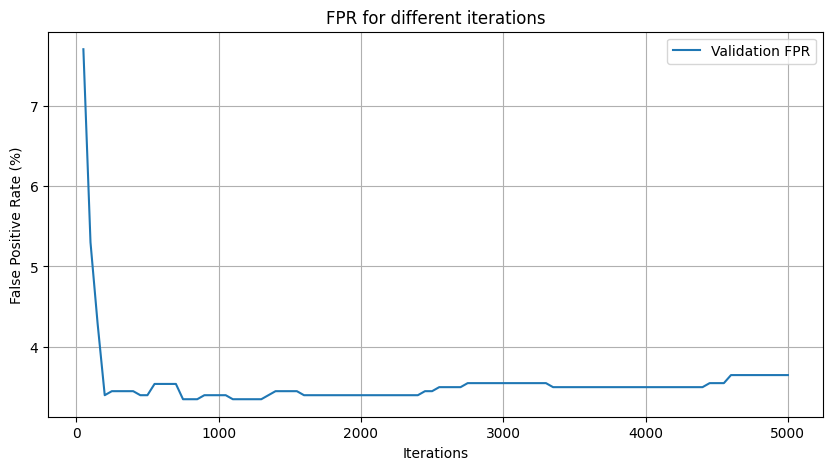

In [3]:
import pandas as pd

data=pd.read_csv('../data/fpr_analysis/logistic_diff_iters.csv')
data['Iterations']=(data['Iterations']/1000)*50
data.plot(kind='line', x='Iterations', y=['Validation FPR'], figsize=(10, 5), grid=True,
           title='FPR for different iterations', ylabel='False Positive Rate (%)')

# Find  bias that minimize the False positive rate

In [9]:
import pvml
import build_vocabulary as bv
import features_extraction as fe
import pandas as pd

validation_accuracy = []
validation_fpr = []
biases = []
voc = bv.get_vocabulary(path='../dataset/', numWords=8000, save=False)
X_train, Y_train = fe.get_bow_representation(voc)
X_valid, Y_valid = fe.get_bow_representation(voc, no_clickbait_path='../dataset/non_clickbait_validation.txt',
                                                clickbait_path='../dataset/clickbait_validation.txt', save=False, stemming=False)
w, b = pvml.logreg_train(
    X_train, Y_train, lambda_=0.01, lr=0.01, steps=800, init_w=None, init_b=0)

for b in range(-10, 10):

    P = pvml.logreg_inference(X_valid, w, b)
    prediction = (P > 0.5)
    accuracy_validation = (prediction == Y_valid).mean()

    true_positives, true_negatives, false_positives, false_negatives, fpr = ms.calculate_metrics(
        Y_valid, prediction)

    validation_accuracy.append(accuracy_validation*100)
    validation_fpr.append(fpr*100)
    biases.append(b)

results = pd.DataFrame({'Bias': biases,
                       'Validation accuracy': validation_accuracy, 'Validation FPR': validation_fpr})
results.to_csv('../data/fpr_analysis/logistic_diff_bias.csv')

In [11]:
import pandas as pd

data = pd.read_csv('../data/fpr_analysis/logistic_diff_bias.csv')
data = data.drop(columns=['Unnamed: 0'])
data.set_index('Bias', inplace=True)
data = data[data['Validation accuracy'] > 85]
data = data[data['Validation FPR'] < 0.5]

data.sort_values(by=['Validation FPR'], inplace=True)
data

,Validation accuracy,Validation FPR
Bias,,
-5,86.80,0.05
-4,90.20,0.15
-3,93.15,0.35
